(64, 32, 32, 3)


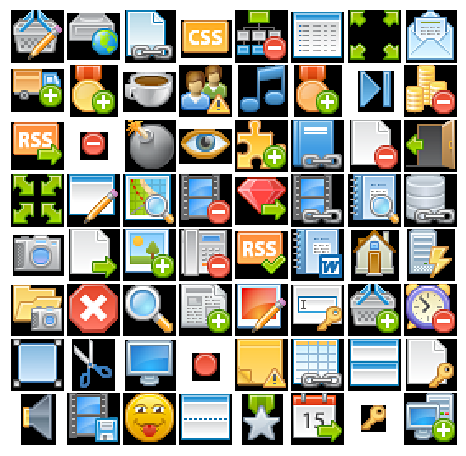

(24, 24, 3)


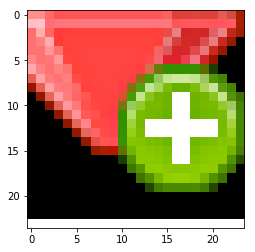

(120, 120, 3)


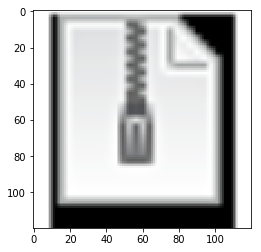

(32, 64, 3)


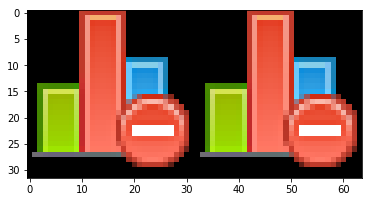

(32, 32, 3)


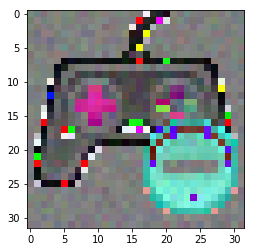

In [1]:
#
# COMMENTS TO DO
#

%matplotlib inline
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.python.framework import dtypes
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from matplotlib import cm

import numpy as np

def plot(samples, w, h, fw, fh, iw=28, ih=28, channels=1):
    fig = plt.figure(figsize=(fw, fh))
    gs = gridspec.GridSpec(w, h)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(iw, ih, channels), cmap=cm.brg)

    return fig

import glob
import os
import matplotlib.pyplot as plt
import scipy.misc
import time

DATA_PATH = "../DATASETS/"
file_list = glob.glob(DATA_PATH + "ICONS/*")

file_list_tensor = ops.convert_to_tensor(file_list, dtype=dtypes.string)

# Makes an input queue string_input_producer
input_queue = tf.train.slice_input_producer([file_list_tensor], shuffle=True)

file_contents = tf.read_file(input_queue[0])

image = tf.image.decode_png(file_contents, channels=3, name="read_image_instance")
image.set_shape([32, 32, 3])
image_float = tf.cast(image, tf.float32)/255.0

##### TRANSFORMATIONS OR NORMALIZATIONS THAT YOU CAN DO####
PATCH_SIZE = 24
ENLARGE = 120
image_crop = tf.random_crop(image_float, size=[PATCH_SIZE, PATCH_SIZE, 3], seed=1)
resized_image =  tf.image.resize_images(image_float, [ENLARGE, ENLARGE], method=0, align_corners=False)
image_with_image = tf.concat([image_float, image_float], axis=1)

##Adding noise 
noise = tf.random_normal(image.get_shape(), mean=0.5, stddev=0.03, dtype=tf.float32, seed=1, name=None)
image_plus_noise = image_float + noise
############################################

NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN = len(file_list)
    
NUM_PREPROCESS_THREADS = 2

min_fraction_of_examples_in_queue = 0.4
min_queue_examples = int(NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN * min_fraction_of_examples_in_queue)
   
BATCH_SIZE=64
images = tf.train.shuffle_batch(
            [image_float],
            batch_size=BATCH_SIZE,
            num_threads=NUM_PREPROCESS_THREADS,
            capacity=min_queue_examples + 3 * BATCH_SIZE,
            min_after_dequeue=min_queue_examples)

with tf.Session() as sess:


    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    tf.global_variables_initializer().run()
    
    out = sess.run(images)
    
    print(out.shape)

    fig=plot(out, w=8, h=8, fw=8, fh=8, iw=32, ih=32, channels=3)
    plt.show()
    
    out_crop = sess.run(image_crop)
    
    print(out_crop.shape)

    plt.imshow(out_crop)
    plt.show()
    
    out_resized = sess.run(resized_image)
    
    print(out_resized.shape)

    plt.imshow(out_resized)
    plt.show()
    
    out_i_w_i = sess.run(image_with_image)
    
    print(out_i_w_i.shape)

    plt.imshow(out_i_w_i)
    plt.show()
    
    
    out_noise = sess.run(image_plus_noise)
    
    print(out_noise.shape)

    plt.imshow(out_noise)
    plt.show()

    coord.request_stop()
    coord.join(threads)
